### Benchmarking heuristic: sorting reducers by length ascending 

26/05/2022

Test sets: 
 - standard
 - 3-15 species biomodels

In [14]:
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

some magic with sys.path in order to load rbench

In [16]:
import os
import sys
sys.path

['/home/ademin/signature-based-gb/f5/rbench-experiments/jupyter',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/home/ademin/.local/lib/python3.9/site-packages',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/ademin/.ipython',
 '/home/ademin/reduce-algebra-code/generic/rbench',
 '/home/ademin/reduce-algebra-code/generic/rbench',
 '/home/ademin/reduce-algebra-code/generic/rbench']

In [17]:
sys.path.append('/home/ademin/reduce-algebra-code/generic/rbench')

In [18]:
import rbench as rb

In [19]:
f5 = rb.read_filetree('../benchmark-results/groebner/big2022-05-26', 'f5').select('boot').deselect(['heapsize', 'valid'])

In [20]:
sortf5 = rb.read_filetree('../benchmark-results/groebner/bigsort2022-05-26', 'sortf5').select('boot').deselect(['heapsize', 'valid'])

In [22]:
f5

f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:48:53+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:49:09+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:48:56+02:00     0.02    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:48:54+02:00     0.01    0.00   
biomodels/BIOMD0000000026 2022-05-26 08:50:05+02:00     0.02    0.01   
...                                             ...      ...     ...   
standard/root7            2022-05-26 08:59:03+02:00     0.02    0.00   
standard/root8            2022-05-26 08:59:02+02:00     0.04    0.00   
standard/root9            2022-05-26 08:59:13+02:00     0.11    0.01   
standard/sparse5          2022-05-26 08:58:55+02:00     0.00    0.01   
standard/trinks           2022-05-26 08:59:04+02:00     0.05    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:48:53+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-26 08:49:09+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-26 08:48:57+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-26 08:48:54+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-26 08:50:05+02:00  
...                                ...                       ...  
standard/root7                     NaN 2022-05-26 08:59:03+02:00  
standard/root8                     NaN 2022-05-26 08:59:02+02:00  
standard/root9                     NaN 2022-05-26 08:59:14+02:00  
standard/sparse5                   NaN 2022-05-26 08:58:55+02:00  
standard/trinks                    NaN 2022-05-26 08:59:04+02:00  

[197 rows x 5 columns]

In [24]:
sortf5

sortf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:24:45+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:24:58+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:24:48+02:00     0.00    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:24:45+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-26 08:25:26+02:00     0.03    0.00   
...                                             ...      ...     ...   
standard/root7            2022-05-26 08:34:53+02:00     0.01    0.02   
standard/root8            2022-05-26 08:34:52+02:00     0.04    0.01   
standard/root9            2022-05-26 08:35:02+02:00     0.13    0.01   
standard/sparse5          2022-05-26 08:34:46+02:00     0.00    0.01   
standard/trinks           2022-05-26 08:34:54+02:00     0.04    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-26 08:24:58+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-26 08:24:48+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-26 08:25:26+02:00  
...                                ...                       ...  
standard/root7                     NaN 2022-05-26 08:34:54+02:00  
standard/root8                     NaN 2022-05-26 08:34:53+02:00  
standard/root9                     NaN 2022-05-26 08:35:03+02:00  
standard/sparse5                   NaN 2022-05-26 08:34:46+02:00  
standard/trinks                    NaN 2022-05-26 08:34:54+02:00  

[197 rows x 5 columns]

<AxesSubplot:xlabel='wall clock time', ylabel='jobs'>

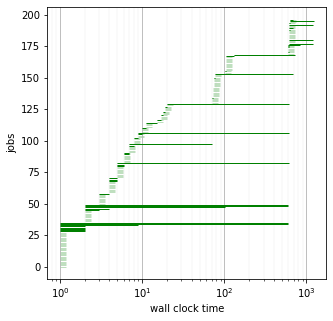

In [25]:
f5.plot.schedule()

<AxesSubplot:xlabel='wall clock time', ylabel='jobs'>

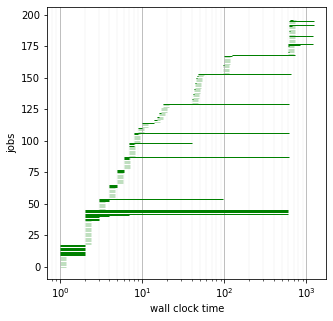

In [26]:
sortf5.plot.schedule()

In [33]:
combo = sortf5.join(f5, how='inner')

In [34]:
combo.head()

sortf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:24:45+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:24:58+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:24:48+02:00     0.00    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:24:45+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-26 08:25:26+02:00     0.03    0.00   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-05-26 08:24:45+02:00   
biomodels/BIOMD0000000003          NaN 2022-05-26 08:24:58+02:00   
biomodels/BIOMD0000000006          NaN 2022-05-26 08:24:48+02:00   
biomodels/BIOMD0000000024          NaN 2022-05-26 08:24:45+02:00   
biomodels/BIOMD0000000026          NaN 2022-05-26 08:25:26+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:48:53+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:49:09+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:48:56+02:00     0.02    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:48:54+02:00     0.01    0.00   
biomodels/BIOMD0000000026 2022-05-26 08:50:05+02:00     0.02    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:48:53+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-26 08:49:09+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-26 08:48:57+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-26 08:48:54+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-26 08:50:05+02:00

In [35]:
# combo.slow(0.05)

#### All models that take more than 0.05 s

In [36]:
combo005 = combo.slow(0.05)

<AxesSubplot:xlabel='(sortf5, cpu_boot)', ylabel='(f5, cpu_boot)'>

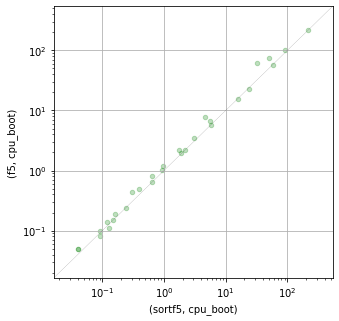

In [37]:
combo005.plot.scatter(x=('sortf5', 'cpu_boot'), y=('f5', 'cpu_boot'), color='g')

In [38]:
combo005.describe()

sortf5                                  f5                        
         cpu_boot    gc_boot sigxcpu_boot    cpu_boot    gc_boot sigxcpu_boot
count   29.000000  29.000000          0.0   29.000000  29.000000          0.0
mean    17.824138   0.010345          NaN   20.301724   0.010690          NaN
std     43.653984   0.004211          NaN   46.452604   0.007036          NaN
min      0.040000   0.000000          NaN    0.050000   0.000000          NaN
25%      0.160000   0.010000          NaN    0.190000   0.010000          NaN
50%      0.950000   0.010000          NaN    1.180000   0.010000          NaN
75%      5.700000   0.010000          NaN    7.760000   0.020000          NaN
max    215.110000   0.020000          NaN  221.110000   0.020000          NaN